In [2]:
import ezkl
import torch
from torch import nn
import json
import os
import time
import scipy
import numpy as np
import matplotlib.pyplot as plt
import statistics
import math

In [3]:
%run -i ../../bench.py

In [4]:
data_sm_50_path = os.path.join('data_sm_50.json')
data_sm_100_path = os.path.join('data_sm_100.json')
data_sm_300_path = os.path.join('data_sm_300.json')
data_sm_600_path = os.path.join('data_sm_600.json')
data_sm_1000_path = os.path.join('data_sm_1000.json')
data_med_50_path = os.path.join('data_med_50.json')
data_med_100_path = os.path.join('data_med_100.json')
data_med_300_path = os.path.join('data_med_300.json')
data_med_600_path = os.path.join('data_med_600.json')
data_med_1000_path = os.path.join('data_med_1000.json')
data_lar_50_path = os.path.join('data_lar_50.json')
data_lar_100_path = os.path.join('data_lar_100.json')
data_lar_300_path = os.path.join('data_lar_300.json')
data_lar_600_path = os.path.join('data_lar_600.json')
data_lar_1000_path = os.path.join('data_lar_1000.json')

In [33]:
def gen_param_func(data_tensor_array):
    # for 1 value, just have 1 element in tensor array
    data_tensor = data_tensor_array[0]
    return [torch.mean(data_tensor)]

def model_func(param):
    class verifier_model(nn.Module):
        def __init__(self):
            super(verifier_model, self).__init__()
            self.w = nn.Parameter(data = param[0], requires_grad = False)

        def forward(self,X):
            # here is witness approach
            return (torch.abs(torch.sum(X)-X.size()[1]*(self.w))<=torch.abs(0.01*X.size()[1]*self.w), self.w)
    return verifier_model

Summary of Proving Time (1% accuracy)

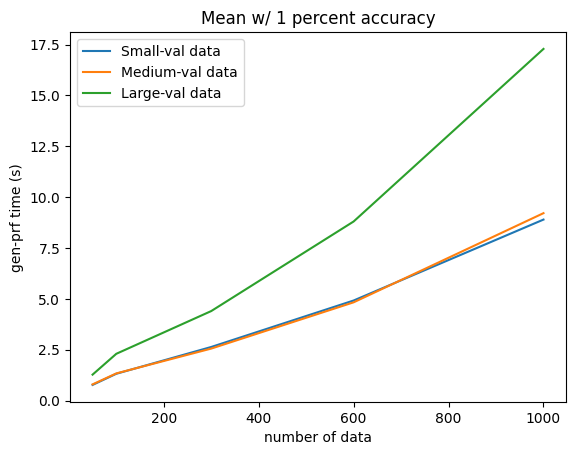

In [35]:
# Hence calibrate scale accordingly to compres the circuit size as long as the answer still within 1 percent
import matplotlib.pyplot as plt
data_number = [50, 100, 300, 600, 1000]
sm_time = [0.7684879302978516,1.3166420459747314,2.6340391635894775, 4.918079853057861 , 8.896933794021606]
plt.title("Mean w/ 1 percent accuracy")
plt.xlabel("number of data")
plt.ylabel("gen-prf time (s)")
plt.plot(data_number, sm_time, label = 'Small-val data')

med_time = [0.7951033115386963, 1.3345720767974854, 2.5550217628479004, 4.829335927963257, 9.212452173233032]
plt.plot(data_number, med_time, label = 'Medium-val data')

lar_time = [1.2746598720550537, 2.2985689640045166, 4.399665117263794, 8.803163051605225, 17.28679895401001]
plt.plot(data_number, lar_time, label = 'Large-val data')


plt.legend()


=============================================================================================================

Small-Valued Data: value 0-1, 3 decimals on 50, 100, 300, 600, 1000 data

In [34]:
bench_one([data_sm_50_path], model_func,gen_param_func, "50 small values","default", "resources")

spawning module 0
spawning module 2


=====================================  50 small values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":9,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[-270,0],"logrows":12,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":3936,"total_assignments":110,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[9],"module_sizes":{"kzg":[],"poseidon":[3936,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  0.7684879302978516
Theory result:  tensor(0.5284, dtype=torch.float64)
Our result:  [0.529296875]


In [18]:
bench_one([data_sm_100_path], model_func,gen_param_func, "100 small values","default", "resources")

=====================================  100 small values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":9,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[-538,0],"logrows":13,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":6560,"total_assignments":210,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[9],"module_sizes":{"kzg":[],"poseidon":[6560,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  1.3166420459747314
Theory result:  tensor(0.5273, dtype=torch.float64)
Our result:  [0.52734375]


In [19]:
bench_one([data_sm_300_path], model_func,gen_param_func, "300 small values","default", "resources")

=====================================  300 small values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":9,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[-1532,4],"logrows":14,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":14432,"total_assignments":610,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[9],"module_sizes":{"kzg":[],"poseidon":[14432,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  2.6340391635894775
Theory result:  tensor(0.5003, dtype=torch.float64)
Our result:  [0.5]


In [20]:
bench_one([data_sm_600_path], model_func,gen_param_func, "600 small values","default", "resources")

=====================================  600 small values  =====================================


spawning module 0
spawning module 2


setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":9,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[-2996,8],"logrows":15,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":26240,"total_assignments":1210,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[9],"module_sizes":{"kzg":[],"poseidon":[26240,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  4.918079853057861
Theory result:  tensor(0.4888, dtype=torch.float64)
Our result:  [0.48828125]


In [21]:
bench_one([data_sm_1000_path], model_func,gen_param_func, "1000 small values","default", "resources")

=====================================  1000 small values  =====================================


spawning module 0
spawning module 2


setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":9,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[-5056,0],"logrows":16,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":45920,"total_assignments":2010,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[9],"module_sizes":{"kzg":[],"poseidon":[45920,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  8.896933794021606
Theory result:  tensor(0.4959, dtype=torch.float64)
Our result:  [0.49609375]


=============================================================================================================

Medium data: value 1-100, 1 decimal on 50, 100, 300, 600, 1000 data

In [11]:
# can use "default" which will set to scale 8, but overkill, we just want 1% accuracy
bench_one([data_med_50_path], model_func,gen_param_func, "50 medium values",[3], "resources")

spawning module 0
spawning module 2


=====================================  50 medium values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":3,"param_scale":3,"scale_rebase_multiplier":10,"lookup_range":[-334,4],"logrows":12,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":3936,"total_assignments":110,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,3],"model_input_scales":[3],"module_sizes":{"kzg":[],"poseidon":[3936,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  0.7951033115386963
Theory result:  tensor(42.1340, dtype=torch.float64)
Our result:  [42.125]


In [12]:
bench_one([data_med_100_path], model_func,gen_param_func, "100 medium values",[3], "resources")

spawning module 0
spawning module 2


=====================================  100 medium values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":3,"param_scale":3,"scale_rebase_multiplier":10,"lookup_range":[-782,4],"logrows":13,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":6560,"total_assignments":210,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,3],"model_input_scales":[3],"module_sizes":{"kzg":[],"poseidon":[6560,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  1.3345720767974854
Theory result:  tensor(49.0990, dtype=torch.float64)
Our result:  [49.125]


In [13]:
bench_one([data_med_300_path], model_func,gen_param_func, "300 medium values",[3], "resources")

spawning module 0
spawning module 2


=====================================  300 medium values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":3,"param_scale":3,"scale_rebase_multiplier":10,"lookup_range":[-2414,0],"logrows":14,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":14432,"total_assignments":610,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,3],"model_input_scales":[3],"module_sizes":{"kzg":[],"poseidon":[14432,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  2.5550217628479004
Theory result:  tensor(50.5647, dtype=torch.float64)
Our result:  [50.625]


In [14]:
bench_one([data_med_600_path], model_func,gen_param_func, "600 medium values",[3], "resources")

spawning module 0
spawning module 2


=====================================  600 medium values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":3,"param_scale":3,"scale_rebase_multiplier":10,"lookup_range":[-4782,0],"logrows":15,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":26240,"total_assignments":1210,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,3],"model_input_scales":[3],"module_sizes":{"kzg":[],"poseidon":[26240,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  4.829335927963257
Theory result:  tensor(50.0158, dtype=torch.float64)
Our result:  [50.0]


In [15]:
bench_one([data_med_1000_path], model_func,gen_param_func, "1000 medium values",[3], "resources")

spawning module 0


=====================================  1000 medium values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":3,"param_scale":3,"scale_rebase_multiplier":10,"lookup_range":[-8186,10],"logrows":16,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":45920,"total_assignments":2010,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,3],"model_input_scales":[3],"module_sizes":{"kzg":[],"poseidon":[45920,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 2
spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  9.212452173233032
Theory result:  tensor(51.2212, dtype=torch.float64)
Our result:  [51.25]


=============================================================================================================

Large-valued data: value 100-10000, 0 decimal on 50, 100, 300, 600, 1000 data

In [22]:
bench_one([data_lar_50_path], model_func,gen_param_func, "50 large values",[0], "resources")

spawning module 0
spawning module 2


=====================================  50 large values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":0,"param_scale":0,"scale_rebase_multiplier":10,"lookup_range":[-5364,0],"logrows":13,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":3936,"total_assignments":110,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,0],"model_input_scales":[0],"module_sizes":{"kzg":[],"poseidon":[3936,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  1.2746598720550537
Theory result:  tensor(5363.5200, dtype=torch.float64)
Our result:  [5364.0]


In [23]:
bench_one([data_lar_100_path], model_func,gen_param_func, "100 large values",[0], "resources")

spawning module 0
spawning module 2


=====================================  100 large values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":0,"param_scale":0,"scale_rebase_multiplier":10,"lookup_range":[-9724,0],"logrows":14,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":6560,"total_assignments":210,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,0],"model_input_scales":[0],"module_sizes":{"kzg":[],"poseidon":[6560,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  2.2985689640045166
Theory result:  tensor(4861.6400, dtype=torch.float64)
Our result:  [4862.0]


In [24]:
bench_one([data_lar_300_path], model_func,gen_param_func, "300 large values",[0], "resources")

spawning module 0
spawning module 2


=====================================  300 large values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":0,"param_scale":0,"scale_rebase_multiplier":10,"lookup_range":[-30072,0],"logrows":15,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":14432,"total_assignments":610,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,0],"model_input_scales":[0],"module_sizes":{"kzg":[],"poseidon":[14432,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  4.399665117263794
Theory result:  tensor(5011.9900, dtype=torch.float64)
Our result:  [5012.0]


In [25]:
bench_one([data_lar_600_path], model_func,gen_param_func, "600 large values",[0], "resources")

spawning module 0
spawning module 2


=====================================  600 large values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":0,"param_scale":0,"scale_rebase_multiplier":10,"lookup_range":[-58640,0],"logrows":16,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":26240,"total_assignments":1210,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,0],"model_input_scales":[0],"module_sizes":{"kzg":[],"poseidon":[26240,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  8.803163051605225
Theory result:  tensor(4886.6633, dtype=torch.float64)
Our result:  [4887.0]


In [26]:
bench_one([data_lar_1000_path], model_func,gen_param_func, "1000 large values",[0], "resources")

spawning module 0


=====================================  1000 large values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":0,"param_scale":0,"scale_rebase_multiplier":10,"lookup_range":[-101974,0],"logrows":17,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":45920,"total_assignments":2010,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,0],"model_input_scales":[0],"module_sizes":{"kzg":[],"poseidon":[45920,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 2
spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  17.28679895401001
Theory result:  tensor(5098.7080, dtype=torch.float64)
Our result:  [5099.0]
